In [3]:
import pandas as pd

filepath = "Sentiment-analysis - Sheet1.csv"

df = pd.read_csv(filepath)
df.head()

,reviews,category or product name,updated-by,reference link,sentiment
0,நல்ல மருந்து மனதிற்கு,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive
1,சிறப்பான அறிமுகம்,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive
2,அற்புதம்,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive
3,அற்புதம்,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive
4,நன்று,நகைச்சுவை நானூறு,priya,https://tamil.pratilipi.com/story/%E0%AE%A8%E0...,positive


In [10]:
df.shape

(344, 2)

In [11]:
from io import StringIO

col = ['reviews', 'sentiment']
df = df[col]

In [12]:
df.head()

,reviews,sentiment
0,நல்ல மருந்து மனதிற்கு,positive
1,சிறப்பான அறிமுகம்,positive
2,அற்புதம்,positive
3,அற்புதம்,positive
4,நன்று,positive


In [13]:
df = df[pd.notnull(df['reviews'])]
df = df[pd.notnull(df['sentiment'])]
df.head()

,reviews,sentiment
0,நல்ல மருந்து மனதிற்கு,positive
1,சிறப்பான அறிமுகம்,positive
2,அற்புதம்,positive
3,அற்புதம்,positive
4,நன்று,positive


/home/sanjju/miniconda3/envs/ml38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


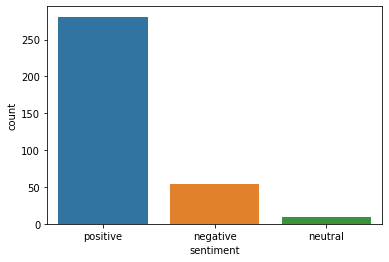

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['sentiment'],label="Count")
plt.show()

In [18]:
# import pylab as pl
# df.('sentiment').hist(bins=30, figsize=(9,9))
# pl.suptitle("Histogram for each numeric input variable")
# plt.savefig('fruits_hist')
# plt.show()

In [19]:
df.shape

(344, 2)

In [20]:

df.isnull().any()

reviews      False
sentiment    False
dtype: bool

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.reviews).toarray()
labels = df.sentiment
features.shape

(344, 321)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['sentiment'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [23]:
y_test

141    negative
6      positive
60     positive
249    positive
54     positive
         ...   
173    positive
12     positive
106    positive
140    positive
278    negative
Name: sentiment, Length: 86, dtype: object

In [24]:
pred = clf.predict(count_vect.transform(X_test))

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 1,  0,  9],
       [ 0,  0,  3],
       [ 0,  0, 73]])

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, pred))

Accuracy score:  0.8604651162790697


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       1.00      0.10      0.18        10
     neutral       0.00      0.00      0.00         3
    positive       0.86      1.00      0.92        73

    accuracy                           0.86        86
   macro avg       0.62      0.37      0.37        86
weighted avg       0.85      0.86      0.81        86



/home/sanjju/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanjju/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanjju/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [28]:

content_list = df['reviews']

for content in content_list[:10]:
    print(content)
    
    print()

நல்ல மருந்து மனதிற்கு

சிறப்பான அறிமுகம்

அற்புதம்

அற்புதம்

நன்று

கதை முழுமையானதாக இல்லை என்றே தோன்றுகிறது

நா.முத்துக்குமார் அவர்கள் வெளியிட்ட முதல் கவிதை புத்தகம். அவரை அறிமுகம் செய்த 'தூர்' என்ற கவிதையும் இப்புத்தகத்தில் தான் உள்ளது. மிகச் சிறிய புத்தகம் தான். எளிய நடையிலேயே கவிதைகள் எழுதப்பட்டுள்ளன.

மூட்டை புத்தகம் கிடைத்தால் என்னையே விற்றாலும் விற்றுவிடுவார் என் அப்பா,.. மனதை தொட்ட வரிகள்..

நா. முத்துக்குமார் அவர்களின் மூன்றாவது புத்தகம் நான் படிப்பதில். சில வரிகளில் ஓராயிரம் உணர்வுகளை தரக்கூடியவர் இவர். ஒரு கிராமத்து கிரிக்கெட், பள்ளி, டென்த் ஏ காயத்ரி, தூர் இவை அனைத்தும் பிடித்தமான கவிதைகள். ஒவ்வொரு கவிதையின் முடிவிலும் ஒரு இனம் புரியாத நெகிழ்வு ஏற்படுத்த முடியும் என்றால் அது இவரால் மட்டுமே சாத்தியம். பிடித்த வரிகள்  யாரும் மெனக்கெடாமலே வருடந்தோறும் உருவாகிறார்கள் சில அறிவாளிகளும் முட்டாள்களும் !  - பள்ளி  இந்த புத்தகத்தில் கண்ணை மூடிக்கொண்டு எந்தப் பக்கத்தை பிரித்தாலும் நல்ல கவிதைகள் வரும் பட்டாம்பூச்சி விற்பவன் - பல வர்ணங்களில்

நா. முத்துக்குமார் நமது தலைமுறையின் புது கவ

In [29]:
print(clf.predict(count_vect.transform(["இல்லை"])))

['negative']
